In [1]:
#1) import necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Lina Gharate\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#MNIST dataset
# 2) Load the training and testing data

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train,x_test = x_train/255.0 , x_test/255.0


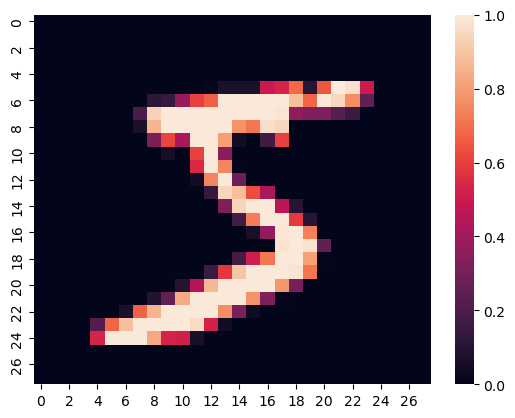

In [3]:
sns.heatmap(x_train[0])
plt.show()

In [4]:
# 3) Define the network architecture using Keras
model= Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dropout(0,2),
    Dense(10)
])

In [5]:
import numpy as np

In [6]:

predictions = model(x_train[:1]).numpy()
predictions

array([[-0.30032307,  0.27976054, -0.09126353,  0.24242426, -0.03758952,
         0.3863816 , -0.2625143 , -0.39482224,  0.7070404 , -0.40163916]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.06841138, 0.12219557, 0.08431829, 0.11771737, 0.08896764,
        0.13594413, 0.07104746, 0.06224263, 0.1873358 , 0.06181977]],
      dtype=float32)

In [8]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
# 4) Train the model using SGD
model.compile(optimizer="adam",loss=loss_fn,metrics=["accuracy"])

In [10]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2588 - accuracy: 0.9260
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1133 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0771 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0577 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0455 - accuracy: 0.9859


In [11]:
# 5) Evaluate the network
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0725 - accuracy: 0.9765 - 1s/epoch - 4ms/step


[0.07247304916381836, 0.9764999747276306]

In [12]:
#validation model
val=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0754 - val_accuracy: 0.9786
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0808 - val_accuracy: 0.9763
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0814 - val_accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0.0941 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.0760 - val_accuracy: 0.9796


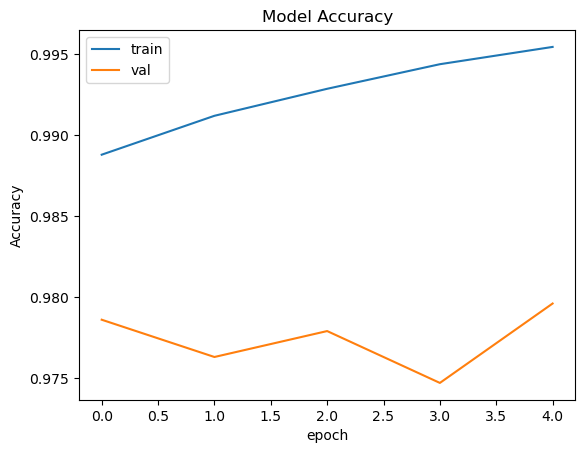

In [13]:
#plot the taining  loss and Accuracy
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()